In [ ]:
#export
from local.test import *
from local.basics import *

In [ ]:
from local.notebook.showdoc import *

In [ ]:
#default_exp callback.progress

# Progress and logging callbacks

> Callback and helper function to track progress of training or log results

In [ ]:
from local.test_utils import *

## ProgressCallback -

In [ ]:
# export
@docs
class ProgressCallback(Callback):
    "A `Callback` to handle the display of progress bars"
    run_after=Recorder

    def begin_fit(self):
        assert hasattr(self.learn, 'recorder')
        if self.create_mbar: 
            self.mbar = master_bar(list(range(self.n_epoch)))
            self.mbar.on_iter_begin()
        if self.learn.logger != noop:
            self.old_logger,self.learn.logger = self.logger,self._write_stats
            self._write_stats(self.recorder.metric_names)
        else: self.old_logger = noop

    def begin_epoch(self):    
        if getattr(self, 'mbar', False): self.mbar.update(self.epoch)
            
    def begin_train(self):    self._launch_pbar()
    def begin_validate(self): self._launch_pbar()
    def after_train(self):    self.pbar.on_iter_end()
    def after_validate(self): self.pbar.on_iter_end()
    def after_batch(self):
        self.pbar.update(self.iter+1)
        if hasattr(self, 'smooth_loss'): self.pbar.comment = f'{self.smooth_loss:.4f}'

    def _launch_pbar(self):
        self.pbar = progress_bar(self.dl, parent=getattr(self, 'mbar', None), leave=False)
        if self.pbar.parent is None: self.pbar.on_iter_begin()
        self.pbar.update(0)

    def after_fit(self):
        if getattr(self, 'mbar', False): self.mbar.on_iter_end()
        self.learn.logger = self.old_logger

    def _write_stats(self, log):
        if getattr(self, 'mbar', False): self.mbar.write([f'{l:.6f}' if isinstance(l, float) else str(l) for l in log], table=True)

    _docs = dict(begin_fit="Setup the master bar over the epochs",
                 begin_epoch="Update the master bar",
                 begin_train="Launch a progress bar over the training dataloader",
                 begin_validate="Launch a progress bar over the validation dataloader",
                 after_train="Close the progress bar over the training dataloader",
                 after_validate="Close the progress bar over the validation dataloader",
                 after_batch="Update the current progress bar",
                 after_fit="Close the master bar")

defaults.callbacks = [TrainEvalCallback, Recorder, ProgressCallback]

In [ ]:
learn = synth_learner()
learn.fit(5)

epoch,train_loss,valid_loss,time
0,6.708173,5.875074,00:00
1,5.864298,4.143571,00:00
2,4.918451,2.674088,00:00
3,4.033785,1.650783,00:00
4,3.270210,0.992416,00:00


In [ ]:
#hide
assert not learn.progress.mbar.child.is_active
lines = learn.progress.mbar.lines
test_eq(learn.recorder.metric_names, lines[0])
for i,(l,v) in enumerate(zip(lines[1:],learn.recorder.values)):
    test_eq(l[:-1], [str(i)] + [f'{x:.6f}' for x in v])

In [ ]:
#export
@patch
@contextmanager
def no_bar(self:Learner):
    "Context manager that deactivates the use of progress bars"
    has_progress = hasattr(self, 'progress')
    if has_progress: self.remove_cb(self.progress)
    yield self
    if has_progress: self.add_cb(ProgressCallback())

In [ ]:
learn = synth_learner()
with learn.no_bar(): learn.fit(5)

(#4) [0,13.986639022827148,10.249855041503906,00:00]
(#4) [1,12.04275894165039,6.990103721618652,00:00]
(#4) [2,9.906261444091797,4.35839319229126,00:00]
(#4) [3,7.970734119415283,2.5757815837860107,00:00]
(#4) [4,6.35130500793457,1.4704259634017944,00:00]


In [ ]:
#hide
#Check validate works without any training
def tst_metric(out, targ): return F.mse_loss(out, targ)
learn = synth_learner(n_trn=5, metrics=tst_metric)
preds,targs = learn.validate()

In [ ]:
#hide
#Check get_preds works without any training
learn = synth_learner(n_trn=5, metrics=tst_metric)
preds,targs = learn.validate()

In [ ]:
show_doc(ProgressCallback.begin_fit)

<h4 id="ProgressCallback.begin_fit" class="doc_header"><code>ProgressCallback.begin_fit</code><a href="https://github.com/fastai/fastai_dev/tree/master/dev/__main__.py#L7" class="source_link" style="float:right">[source]</a></h4>

> <code>ProgressCallback.begin_fit</code>()

Setup the master bar over the epochs

In [ ]:
show_doc(ProgressCallback.begin_epoch)

<h4 id="ProgressCallback.begin_epoch" class="doc_header"><code>ProgressCallback.begin_epoch</code><a href="https://github.com/fastai/fastai_dev/tree/master/dev/__main__.py#L17" class="source_link" style="float:right">[source]</a></h4>

> <code>ProgressCallback.begin_epoch</code>()

Update the master bar

In [ ]:
show_doc(ProgressCallback.begin_train)

<h4 id="ProgressCallback.begin_train" class="doc_header"><code>ProgressCallback.begin_train</code><a href="https://github.com/fastai/fastai_dev/tree/master/dev/__main__.py#L20" class="source_link" style="float:right">[source]</a></h4>

> <code>ProgressCallback.begin_train</code>()

Launch a progress bar over the training dataloader

In [ ]:
show_doc(ProgressCallback.begin_validate)

<h4 id="ProgressCallback.begin_validate" class="doc_header"><code>ProgressCallback.begin_validate</code><a href="https://github.com/fastai/fastai_dev/tree/master/dev/__main__.py#L21" class="source_link" style="float:right">[source]</a></h4>

> <code>ProgressCallback.begin_validate</code>()

Launch a progress bar over the validation dataloader

In [ ]:
show_doc(ProgressCallback.after_batch)

<h4 id="ProgressCallback.after_batch" class="doc_header"><code>ProgressCallback.after_batch</code><a href="https://github.com/fastai/fastai_dev/tree/master/dev/__main__.py#L24" class="source_link" style="float:right">[source]</a></h4>

> <code>ProgressCallback.after_batch</code>()

Update the current progress bar

In [ ]:
show_doc(ProgressCallback.after_train)

<h4 id="ProgressCallback.after_train" class="doc_header"><code>ProgressCallback.after_train</code><a href="https://github.com/fastai/fastai_dev/tree/master/dev/__main__.py#L22" class="source_link" style="float:right">[source]</a></h4>

> <code>ProgressCallback.after_train</code>()

Close the progress bar over the training dataloader

In [ ]:
show_doc(ProgressCallback.after_validate)

<h4 id="ProgressCallback.after_validate" class="doc_header"><code>ProgressCallback.after_validate</code><a href="https://github.com/fastai/fastai_dev/tree/master/dev/__main__.py#L23" class="source_link" style="float:right">[source]</a></h4>

> <code>ProgressCallback.after_validate</code>()

Close the progress bar over the validation dataloader

In [ ]:
show_doc(ProgressCallback.after_fit)

<h4 id="ProgressCallback.after_fit" class="doc_header"><code>ProgressCallback.after_fit</code><a href="https://github.com/fastai/fastai_dev/tree/master/dev/__main__.py#L33" class="source_link" style="float:right">[source]</a></h4>

> <code>ProgressCallback.after_fit</code>()

Close the master bar

## ShowGraphCallback -

In [ ]:
# export
class ShowGraphCallback(Callback):
    "Update a graph of training and validation loss"
    run_after=ProgressCallback

    def begin_fit(self):
        self.nb_batches = []
        assert hasattr(self.learn, 'progress')

    def after_train(self): self.nb_batches.append(self.train_iter)

    def after_epoch(self):
        "Plot validation loss in the pbar graph"
        rec = self.learn.recorder
        iters = range_of(rec.losses)
        val_losses = [v[1] for v in rec.values]
        x_bounds = (0, (self.n_epoch - len(self.nb_batches)) * self.nb_batches[0] + len(rec.losses))
        y_bounds = (0, max((max(Tensor(rec.losses)), max(Tensor(val_losses)))))
        self.progress.mbar.update_graph([(iters, rec.losses), (self.nb_batches, val_losses)], x_bounds, y_bounds)

epoch,train_loss,valid_loss,time
0,8.052855,7.121447,00:00
1,6.998592,4.958437,00:00
2,5.832296,3.137894,00:00
3,4.745234,1.909536,00:00
4,3.821305,1.115876,00:00
5,3.056373,0.658053,00:00
6,2.444679,0.377813,00:00
7,1.955691,0.218240,00:00
8,1.567441,0.126210,00:00
9,1.259163,0.073769,00:00


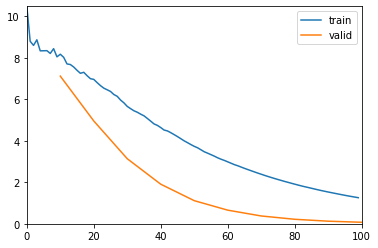

In [ ]:
#slow
learn = synth_learner(cbs=ShowGraphCallback())
learn.fit(10)

## CSVLogger -

In [ ]:
# export
class CSVLogger(Callback):
    run_after=Recorder
    "Log the results displayed in `learn.path/fname`"
    def __init__(self, fname='history.csv', append=False):
        self.fname,self.append = Path(fname),append

    def read_log(self):
        "Convenience method to quickly access the log."
        return pd.read_csv(self.path/self.fname)

    def begin_fit(self):
        "Prepare file with metric names."
        self.path.parent.mkdir(parents=True, exist_ok=True)
        self.file = (self.path/self.fname).open('a' if self.append else 'w')
        self.file.write(','.join(self.recorder.metric_names) + '\n')
        self.old_logger,self.learn.logger = self.logger,self._write_line

    def _write_line(self, log):
        "Write a line with `log` and call the old logger."
        self.file.write(','.join([str(t) for t in log]) + '\n')
        self.old_logger(log)

    def after_fit(self):
        "Close the file and clean up."
        self.file.close()
        self.learn.logger = self.old_logger

The results are appened to an existing file if `append`, or they overwrite it otherwise.

In [ ]:
learn = synth_learner(cbs=CSVLogger())
learn.fit(5)

epoch,train_loss,valid_loss,time
0,13.575512,15.007103,00:00
1,11.888121,10.582724,00:00
2,9.983163,6.954432,00:00
3,8.199842,4.460877,00:00
4,6.674955,2.722394,00:00


In [ ]:
show_doc(CSVLogger.read_log)

<h4 id="CSVLogger.read_log" class="doc_header"><code>CSVLogger.read_log</code><a href="https://github.com/fastai/fastai_dev/tree/master/dev/__main__.py#L8" class="source_link" style="float:right">[source]</a></h4>

> <code>CSVLogger.read_log</code>()

Convenience method to quickly access the log.

In [ ]:
df = learn.csv_logger.read_log()
test_eq(df.columns.values, learn.recorder.metric_names)
for i,v in enumerate(learn.recorder.values):
    test_close(df.iloc[i][:3], [i] + v)
os.remove(learn.path/learn.csv_logger.fname)

In [ ]:
show_doc(CSVLogger.begin_fit)

<h4 id="CSVLogger.begin_fit" class="doc_header"><code>CSVLogger.begin_fit</code><a href="https://github.com/fastai/fastai_dev/tree/master/dev/__main__.py#L12" class="source_link" style="float:right">[source]</a></h4>

> <code>CSVLogger.begin_fit</code>()

Prepare file with metric names.

In [ ]:
show_doc(CSVLogger.after_fit)

<h4 id="CSVLogger.after_fit" class="doc_header"><code>CSVLogger.after_fit</code><a href="https://github.com/fastai/fastai_dev/tree/master/dev/__main__.py#L24" class="source_link" style="float:right">[source]</a></h4>

> <code>CSVLogger.after_fit</code>()

Close the file and clean up.

## Export -

In [ ]:
#hide
from local.notebook.export import notebook2script
notebook2script(all_fs=True)

Converted 00_test.ipynb.
Converted 01_core_foundation.ipynb.
Converted 01a_core_utils.ipynb.
Converted 01b_core_dispatch.ipynb.
Converted 01c_core_transform.ipynb.
Converted 02_core_script.ipynb.
Converted 03_torchcore.ipynb.
Converted 03a_layers.ipynb.
Converted 04_data_load.ipynb.
Converted 05_data_core.ipynb.
Converted 06_data_transforms.ipynb.
Converted 07_data_block.ipynb.
Converted 08_vision_core.ipynb.
Converted 09_vision_augment.ipynb.
Converted 09a_vision_data.ipynb.
Converted 10_pets_tutorial.ipynb.
Converted 11_vision_models_xresnet.ipynb.
Converted 12_optimizer.ipynb.
Converted 13_learner.ipynb.
Converted 13a_metrics.ipynb.
Converted 14_callback_schedule.ipynb.
Converted 14a_callback_data.ipynb.
Converted 15_callback_hook.ipynb.
Converted 15a_vision_models_unet.ipynb.
Converted 16_callback_progress.ipynb.
Converted 17_callback_tracker.ipynb.
Converted 18_callback_fp16.ipynb.
Converted 19_callback_mixup.ipynb.
Converted 20_interpret.ipynb.
Converted 20a_distributed.ipynb.
Co